# Hands on

In [6]:
%pylab inline
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## Download the dataset

In [4]:
# ! conda install -n MLPB wget
# wget https://doi.org/10.1371/journal.pone.0183228.s006 -O Metabolite_patterns_predicting_sex_and_age.xlsx
# ! mkdir ../input
#! mv Metabolite_patterns_predicting_sex_and_age.xlsx ../input

## Load the data into memory

In [11]:
filename = '../input/Metabolite_patterns_predicting_sex_and_age.xlsx'

In [14]:
Y = pd.read_excel(filename, usecols=[0,1,2], skiprows=[0,1,2,3,5], skipfooter=7).age.values
Y

In [15]:
X = pd.read_excel(filename, header=3, skipfooter=7, usecols=range(4,441), skiprows=[4,5])
X

# EDA
Spend a few minutes on getting familiar with the dataset.

In [ ]:
X.info

In [ ]:
X.types

In [ ]:
X.mean()

In [ ]:
X.std()

In [24]:
X.isnull().any()

Carnitine                  True
Betaine                    True
Choline                    True
Dimethyl-glycine           True
Sarcosine                  True
                           ... 
eicosadienoic acid         True
dihomo-γ-linolenic acid    True
behenic acid               True
arachidonic acid           True
eicosapentaenoic acid      True
Length: 437, dtype: bool

In [30]:
X.fillna(0)
X.isna().any()

Carnitine                  True
Betaine                    True
Choline                    True
Dimethyl-glycine           True
Sarcosine                  True
                           ... 
eicosadienoic acid         True
dihomo-γ-linolenic acid    True
behenic acid               True
arachidonic acid           True
eicosapentaenoic acid      True
Length: 437, dtype: bool

## Plot histograms

### Option 1

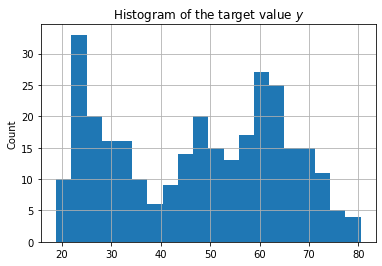

In [31]:
hist(Y, bins=20)
title('Histogram of the target value $y$')
ylabel('Count')
grid()

### Option 2

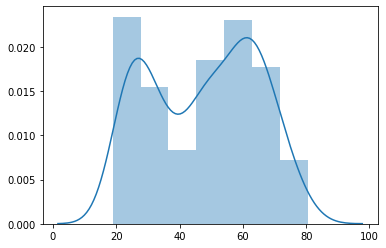

In [32]:
sns.distplot(Y)

Text(0.5, 1.03, 'Relationship of features with $y$')

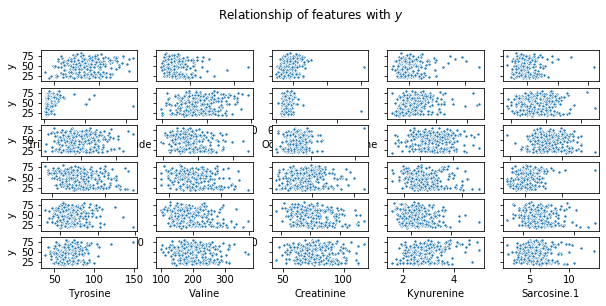

In [35]:
fig, axes = subplots(6,5, figsize=(10,4), sharey=True)
axes = axes.flatten()

df = X.copy()
df['y'] = Y

for i, col in enumerate(column_names):
    sns.scatterplot(col, 'y', ax=axes[i], data=df, s=10)
    
suptitle('Relationship of features with $y$', y=1.03)

#### Replace the missing values in X with the column-wise median

In [37]:
X.isnull().any()

Carnitine                  True
Betaine                    True
Choline                    True
Dimethyl-glycine           True
Sarcosine                  True
                           ... 
eicosadienoic acid         True
dihomo-γ-linolenic acid    True
behenic acid               True
arachidonic acid           True
eicosapentaenoic acid      True
Length: 437, dtype: bool

In [38]:
X.isnull().sum()

Carnitine                  1
Betaine                    1
Choline                    1
Dimethyl-glycine           1
Sarcosine                  1
                          ..
eicosadienoic acid         1
dihomo-γ-linolenic acid    1
behenic acid               1
arachidonic acid           1
eicosapentaenoic acid      1
Length: 437, dtype: int64

Replace values with median

In [39]:
X = X.fillna(X.median())

Check values are replaced:

In [40]:
X.isnull().any()

Carnitine                  False
Betaine                    False
Choline                    False
Dimethyl-glycine           False
Sarcosine                  False
                           ...  
eicosadienoic acid         False
dihomo-γ-linolenic acid    False
behenic acid               False
arachidonic acid           False
eicosapentaenoic acid      False
Length: 437, dtype: bool

#### Scale the features in X so that the column-wise mean is 0 and the standard deviation is 1.
Use scikit-learn `StandardScaler()` for this with the code given below.

In [233]:
X.loc[:, :] = StandardScaler().fit_transform(X)

#### Validate that the scaling worked.

In [234]:
X.std()

Carnitine                  1.001665
Betaine                    1.001665
Choline                    1.001665
Dimethyl-glycine           1.001665
Sarcosine                  1.001665
                             ...   
eicosadienoic acid         1.001665
dihomo-γ-linolenic acid    1.001665
behenic acid               1.001665
arachidonic acid           1.001665
eicosapentaenoic acid      1.001665
Length: 437, dtype: float64

In [235]:
X.mean()

Carnitine                 -8.497263e-16
Betaine                   -1.091781e-16
Choline                    6.176307e-16
Dimethyl-glycine           2.996864e-16
Sarcosine                  2.218602e-16
                               ...     
eicosadienoic acid        -1.305711e-16
dihomo-γ-linolenic acid   -2.537653e-16
behenic acid              -2.618798e-17
arachidonic acid           2.829040e-16
eicosapentaenoic acid      2.445441e-16
Length: 437, dtype: float64

Text(0, 0.5, 'Value')

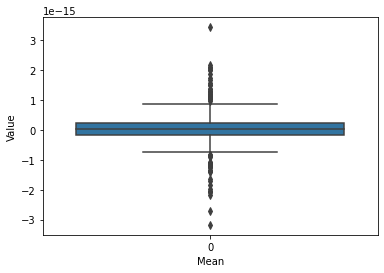

In [236]:
sns.boxplot(data=X.mean())
xlabel('Mean')
ylabel('Value')

### Train a Linear Model using a train-test split of 0.8 / 0.2

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=23463)

# print the shape of each one of the np.arrays 
print(f'X_train: {X_train.shape} y_train: {y_train.shape}')  # training subsets
print(f'X_test:  {X_test.shape} y_test:  {y_test.shape}')   # test subsets

X_train: (240, 437) y_train: (240,)
X_test:  (61, 437) y_test:  (61,)


In [45]:
model = LinearRegression()

In [46]:
# Train the model using the training sets
model=model.fit(X_train, y_train)

#### Plot the prediction over the true values for the test set

In [47]:
# Make predictions using the testing set
y_predict = model.predict(X_test)
y_predict

array([ 10.73795356,  45.34363875,  83.92959927, -21.45683034,
       -14.63968958,  66.16757463,  37.76604135,  51.94173413,
        75.05169021,  65.4430981 , 129.38022367,  44.59858759,
       102.8459059 ,  52.41913158,  24.14499554,  45.39639905,
        53.473271  ,  56.50767394,  75.10759544,  40.28468859,
       -32.66955378, -34.16753472, -59.25441699,  47.84251276,
        28.48190302,  52.67019732,  39.25857835,  96.4168418 ,
        59.86642337,  65.79872157,  74.4998508 ,  58.76173835,
        69.80230421,  70.57769911,  85.81306215,  18.94879451,
        48.03848751,  53.24131389,  12.99283795,  35.74587918,
        39.02965656,   1.58885098,  -2.12490654, -25.60714778,
        51.36537251,  65.13436958,  45.16142957,  52.57248255,
        97.09752036,  46.86587859,  30.84802667,  72.14560469,
         1.99634271, -34.79029955, -13.28907359,  27.97180324,
        19.93619264,  36.54124625,  44.97600804,  95.07033369,
        97.46688092])

Text(0, 0.5, 'Prediction')

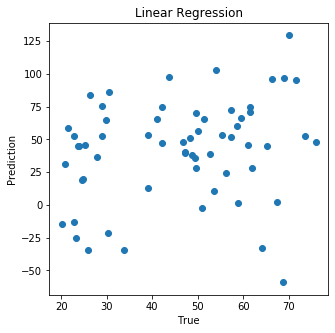

In [50]:
figure(figsize=(5,5))

scatter(y_test, model.predict(X_test), label='Test')

title('Linear Regression')
xlabel('True')
ylabel('Prediction')

In [51]:
# Define rmse
def rmse(true, pred):
    return sqrt(mean_squared_error(true, pred))

In [52]:
# Score 
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train score: {train_score:8.2f}\nTest score:  {test_score:8.2f}')
print('Test RMSE: {:2.2f}'.format(rmse(y_test, y_predict)))

Train score:     1.00
Test score:     -4.38
Test RMSE: 37.99


### Train a Lasso model and vary the regularization paramter $\alpha$ from 0 to 5

In [63]:
from sklearn.linear_model import Lasso



#### Plot the model scores over alphas

#### Retrain a model with the best value for $\alpha$

#### Create a dataset from non-zero features and add the values for age
Which featurs are most important to predict the age?

In [65]:
df_reduced = X.loc[:, model.coef_ > 0].copy()
df_reduced['age'] = Y

In [66]:
df_reduced

,Carnitine,Betaine,Choline,Trimethyl-amine-N-oxide,Octadecenoyl-carnitine,Acetyl-carnitine,Arginine,Asparagine,Isoleucine,Leucine,...,penta-decylic acid,palmitic acid,branched chain fatty acid,stearic acid,vaccenic acid,oleic acid,arachidic acid,linolenic acid,eicosadienoic acid,age
0,35.23,40.50,9.33,2.71,0.086949,6.701261,110.059331,44.344423,72.906977,140.448000,...,3.784336,746.542709,2.387500,200.014929,1.385931,583.399009,1.018861,12.976936,6.425830,66.368241
1,35.91,46.89,10.46,2.31,0.098029,5.273254,85.136194,56.696517,99.340596,225.818182,...,3.493915,671.912343,2.466334,187.478587,2.176561,671.346575,0.568165,14.886331,5.326137,23.644875
2,48.71,28.48,11.26,13.98,0.080647,8.379945,94.925373,42.577114,93.979358,176.727273,...,4.557437,460.166794,2.179470,138.323814,2.830302,437.770058,0.812510,9.174221,3.232012,50.986995
3,27.14,42.01,9.26,3.72,0.059488,3.251767,57.944030,47.064677,83.362003,149.454545,...,3.522936,490.388798,2.782658,159.723622,1.442222,615.448008,0.050000,11.952802,4.963583,23.368375
4,33.28,35.71,9.38,3.57,0.119423,6.518342,83.443980,45.204211,93.180031,162.937500,...,13.508227,797.088857,8.367614,257.335178,13.244077,700.451721,1.179900,16.980451,6.281183,57.310078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,18.63,32.86,9.05,8.07,0.087723,5.221705,92.909456,36.572890,88.172151,165.846154,...,5.040551,492.264226,2.204650,120.027468,2.104887,477.155101,0.721696,12.335160,2.797412,24.518125
297,44.64,51.36,10.97,7.70,0.103226,7.594045,111.833518,67.815648,96.046296,177.752988,...,2.957553,409.468268,1.759709,137.480103,1.534679,341.293172,0.050000,6.906590,2.574722,29.485308
298,24.21,17.44,7.07,1.36,0.081677,4.202956,71.922290,64.137192,59.583333,106.231076,...,6.143990,532.882101,4.266374,148.628378,3.420946,519.794890,0.739006,24.931578,3.221425,38.381257
299,27.04,28.82,5.83,1.71,0.098001,6.590365,83.979943,46.813299,81.882022,179.384615,...,5.495221,357.427763,1.970351,103.096967,1.912102,280.612557,0.581049,4.359657,3.039871,23.989705


In [71]:
df_reduced.columns.tolist()[np.argmax(model.coef_[model.coef_ > 0])]

'Diacyl-phosphatidyl-choline C42:4'

## Plot the correlation

Text(0.5, 1, 'Correlation plot')

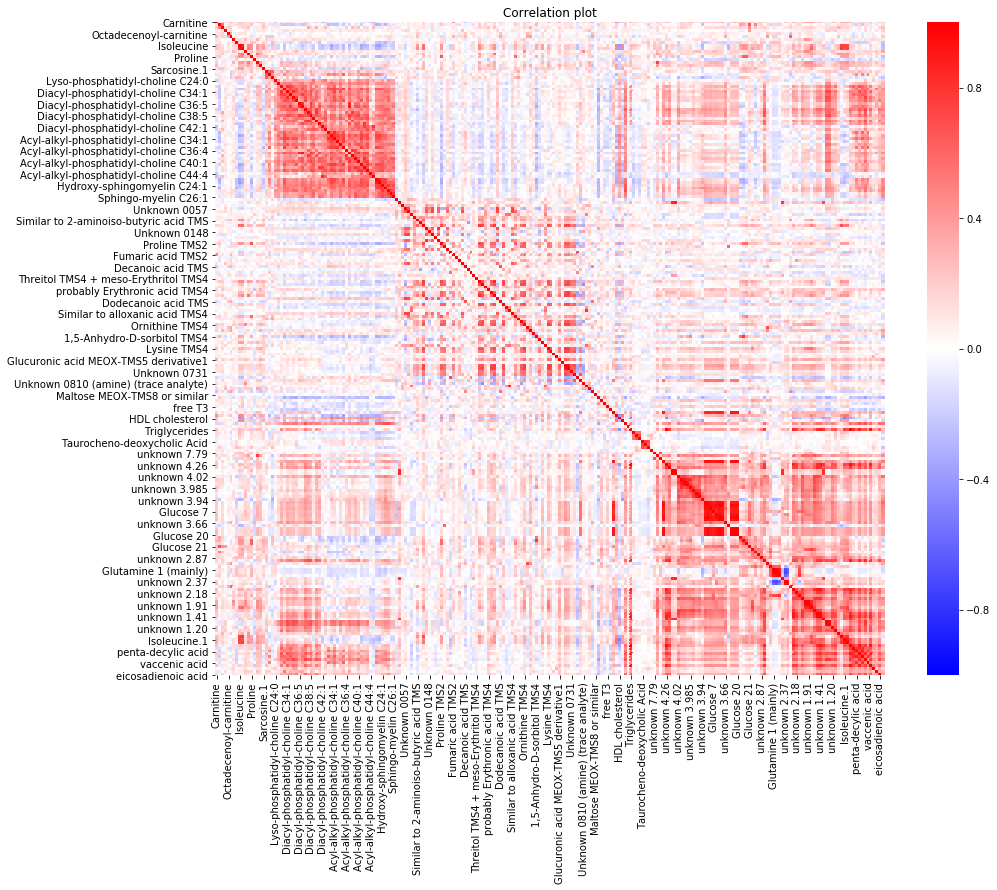

In [72]:
import seaborn as sns 
figure(figsize=(15,12))
sns.heatmap(df_reduced.corr(),vmin=-1,vmax=1,cmap=cm.bwr)
title('Correlation plot')